In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
pd.set_option('display.max_columns', 500)

from allensdk.brain_observatory.behavior.behavior_ophys_experiment import BehaviorOphysExperiment
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

import allensdk
import pkg_resources

import yaml

# Suppress all warnings because there are a lot of annoying user warnings when downloading stuff
import warnings
warnings.filterwarnings("ignore")

# Setting up InteractiveShell for better df visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# exporter functions
from allen_exporter.exporter import multi_session_export

print("Import confirmed")
print("Allensdk version : ", allensdk.__version__)

Import confirmed
Allensdk version :  2.16.2


In [2]:
# Define the directory for the cache to prevent downloading every time
cache_dir = "../data/./visual_behaviour_cache"
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)

In [3]:
# Load experiment metadata
experiments_table = cache.get_ophys_experiment_table()

# Select a specific experiment by ID
experiment_id = experiments_table.index[0]  # Example: take the first experiment

experiments_table.head()

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,imaging_depth,targeted_structure,targeted_imaging_depth,imaging_plane_group,project_code,session_type,session_number,image_set,behavior_type,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
951980471,951520319,951410079,1018028342,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,150,VISp,150,0,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,0
951980473,951520319,951410079,1018028345,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,225,VISp,225,0,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,1
951980475,951520319,951410079,1018028339,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,75,VISp,75,1,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,2
951980479,951520319,951410079,1018028354,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,150,VISl,150,2,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,3
951980481,951520319,951410079,1018028357,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,225,VISl,225,2,VisualBehaviorMultiscope,OPHYS_1_images_A,1,A,active_behavior,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,4


In [4]:
# loading cache of a single experiment to explore
experiment = cache.get_behavior_ophys_experiment(experiment_id)

In [5]:
experiment

In [6]:
#### metadata of single experiment
experiment.metadata

{'equipment_name': 'MESO.1',
 'sex': 'F',
 'age_in_days': 206,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_1_images_A',
 'date_of_acquisition': datetime.datetime(2019, 9, 20, 9, 59, 38, 837000, tzinfo=tzlocal()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('592420fb-911d-41c5-8763-4ebdeb0ef416'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '457841',
 'project_code': 'VisualBehaviorMultiscope',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 951520319,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 1018028342,
 'field_of_view_height': 512,
 'field_of_view_width': 512,
 'imaging_depth': 150,
 'targeted_imaging_depth': 150,
 'imaging_plane_group': 0,
 'imaging_plane_group_count': 4,
 'ophys_experiment_id': 951980471,
 'ophys_frame_rate': 11.0,
 'ophys_session_id': 951410079,
 'targeted_structure': 'VISp'}

From the metadata we know that this is a Multiscope experiment where 2 areas at 4 different depths were measured.

In [7]:
cells_table = experiment.cell_specimen_table
#cells_table.head(3)
print(cells_table[['x','y']].to_numpy())

[[288 190]
 [454 217]
 [376  33]
 [201 462]
 [384 223]
 [426 278]
 [419 232]
 [258 110]
 [444 100]
 [229  60]
 [201  34]
 [203 167]]


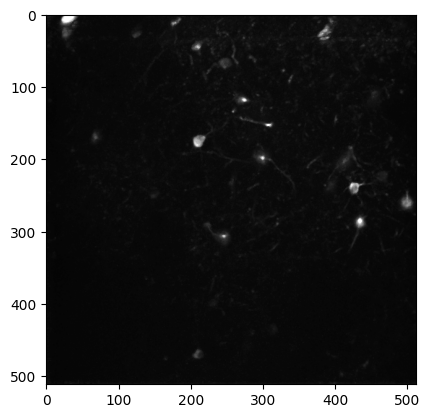

In [8]:
plt.imshow(experiment.max_projection, cmap='gray')

In [9]:
timestamps_ophys = experiment.ophys_timestamps
timestamps_ophys
# this are the timestamps for the ophys measurements

array([   9.26356,    9.35677,    9.44998, ..., 4513.62526, 4513.71849,
       4513.81173])

In [10]:
# Preview of dff_trace dataframe
dff_table = experiment.dff_traces
dff_table.head()
print(f"Shape of dff signals : {dff_table['dff'].iloc[0].shape}")

,cell_roi_id,dff
cell_specimen_id,,
1086613265,1080743723,"[0.9365729093551636, 0.5824856162071228, 1.296..."
1086613823,1080743752,"[0.555761456489563, 0.7478731870651245, 0.4397..."
1086619526,1080743754,"[0.2593991160392761, 0.30149346590042114, 0.34..."
1086614149,1080743763,"[0.4112476706504822, 0.1977161169052124, 0.143..."
1086614351,1080743765,"[0.08977238088846207, 0.0746675506234169, 0.26..."


Shape of dff signals : (48316,)


We can confirm that there are indeed roughly 11 frames per second per neuron during the whole experiment if we divide the lenght of the dff array by the max value of end_time. Hence the signals should be evenly spread across the whole timescale.

In [11]:
# Preview of event dataframe
event_table = experiment.events
#event_table.head()
event_values = event_table[['events', 'filtered_events', 'lambda', 'noise_std']].to_numpy()
event_values.shape


(12, 4)

In [13]:
# 30 measurements per second
eye_tracking_table = experiment.eye_tracking
eye_tracking_table.head(5)

,timestamps,cr_area,eye_area,pupil_area,likely_blink,pupil_area_raw,cr_area_raw,eye_area_raw,cr_center_x,cr_center_y,cr_width,cr_height,cr_phi,eye_center_x,eye_center_y,eye_width,eye_height,eye_phi,pupil_center_x,pupil_center_y,pupil_width,pupil_height,pupil_phi
frame,,,,,,,,,,,,,,,,,,,,,,,
0,0.15829,183.586742,63999.056889,12139.327201,False,12139.327201,183.586742,63999.056889,346.607136,223.948715,8.174382,7.148856,0.475273,359.155663,206.109419,159.882116,127.415955,-0.104048,324.758778,217.811200,62.161627,61.233369,-0.537537
1,0.17177,183.453405,63878.120921,12255.297397,False,12255.297397,183.453405,63878.120921,346.946852,224.188518,8.134800,7.178423,0.207310,359.295294,205.999745,160.111177,126.993242,-0.109490,324.781277,218.094581,62.457844,61.034058,-0.507705
2,0.18748,176.245497,63975.675600,12128.875269,False,12128.875269,176.245497,63975.675600,346.735257,224.643936,8.277178,6.777755,0.129989,358.987745,206.186120,159.889628,127.363421,-0.110130,325.287244,217.632501,62.134861,61.513908,0.731344
3,0.20904,182.139778,63997.358050,12394.953413,False,12394.953413,182.139778,63997.358050,346.869934,224.778881,8.274451,7.006735,0.092576,359.471260,206.022686,159.963601,127.347669,-0.106686,325.115191,218.329534,62.812707,60.753917,-0.113071
4,0.24243,186.747323,64046.312897,12436.578877,False,12436.578877,186.747323,64046.312897,346.672515,224.512521,8.212549,7.238132,0.149725,359.413554,206.041874,160.226985,127.235588,-0.112555,324.953067,217.859342,62.918090,59.972431,-0.252311


In [13]:
# Preview of running speed dataframe
running_speed_table = experiment.running_speed
treadmill_sampling_rate = running_speed_table.shape[0] / running_speed_table["timestamps"].iloc[-1]
print("Sampling rate : ", treadmill_sampling_rate)
running_speed_table

Sampling rate :  59.8281581140981


,timestamps,speed
0,6.87653,0.039084
1,9.28021,1.448758
2,9.29687,2.724152
3,9.31357,3.763775
4,9.33024,4.505150
...,...,...
270048,4513.74432,0.994029
270049,4513.76099,1.565881
270050,4513.77764,2.329033
270051,4513.79435,3.250289


Not included in metadata but running speed is roughly measured every at 60hz. (270053/4513). However the measurements don't seem to be perfectly spread out.

In [14]:
# Preview of stimuli dataframe
stimulus_table = experiment.stimulus_presentations
stimulus_table.head()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,is_sham_change,stimulus_name,active
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
0,0,initial_gray_screen_5min,-99,NaN,-99,309.311855,0.000000,309.311855,0,17985,False,<NA>,<NA>,-99,0,-99,False,spontaneous,False
1,1,change_detection_behavior,0,im065,-99,0.250210,309.311855,309.562065,17985,18000,False,False,False,-99,1,0,False,Natural_Images_Lum_Matched_set_training_2017,True
2,1,change_detection_behavior,0,im065,-99,0.250230,310.062485,310.312715,18030,18045,False,False,False,-99,2,0,False,Natural_Images_Lum_Matched_set_training_2017,True
3,1,change_detection_behavior,0,im065,-99,0.250210,310.813105,311.063315,18075,18090,False,False,False,-99,3,0,False,Natural_Images_Lum_Matched_set_training_2017,True
4,1,change_detection_behavior,0,im065,-99,0.250200,311.563725,311.813925,18120,18135,False,False,False,-99,4,0,False,Natural_Images_Lum_Matched_set_training_2017,True


In [15]:
mv_names = stimulus_table[stimulus_table['stimulus_block_name'].str.contains('movie', case=False, na=False)]['stimulus_block_name'].unique()

print(mv_names)

['natural_movie_one']


In [16]:
stimulus_templates = experiment.stimulus_templates
images = stimulus_table["image_name"]
stimulus_templates.index

# here we can see that the experiment actually only includes 8 different images we should definetly not save those 8 images 10000 times.

Index(['im065', 'im077', 'im066', 'im061', 'im063', 'im062', 'im085', 'im069'], dtype='object', name='image_name')

# calculating metrics also found in exporter.py

In [17]:
# get mean pixel
stimulus_images = stimulus_table[stimulus_table['image_name'].str.contains('im', case=False, na=False)]
images_mean = stimulus_templates['warped'].sort_index().apply(np.mean)#use .apply here for row wise mean

counts = stimulus_images['image_name'].value_counts().sort_index()
nr_rows = sum(counts)

mean_pixel = np.mean(images_mean * (counts / nr_rows))
print(mean_pixel)

15.699243062745634


In [18]:
# caluclate mean speed of the mouse
mean_speed = running_speed_table['speed'].mean()
print(mean_speed)

0.37322501627696786


In [19]:
# caluclate average df/f and event values
mean_dff = np.mean(dff_table['dff'].mean())
mean_event = np.mean(event_table['events'].mean())
print(mean_dff, mean_event)

0.05474965566534136 0.00886335337994892


In [20]:
# calculate mean for every column except timestamps as they are saved seperately in meta and it makes no sense to get their mean
eye_tracking_data = eye_tracking_table.drop('timestamps', axis=1)
mean_values = eye_tracking_data.mean()
data = {col: str(mean) for col, mean in mean_values.items()}
data

{'cr_area': '156.45148456831814',
 'eye_area': '51668.72107002719',
 'pupil_area': '6911.382927710681',
 'likely_blink': '0.02616987592503958',
 'pupil_area_raw': '7186.576541185436',
 'cr_area_raw': '156.95125719522946',
 'eye_area_raw': '51769.98207845086',
 'cr_center_x': '351.2665847776835',
 'cr_center_y': '225.39835329766845',
 'cr_width': '7.518213195350974',
 'cr_height': '6.606158631219061',
 'cr_phi': '0.1528356330880455',
 'eye_center_x': '365.41433192104466',
 'eye_center_y': '205.7810826164501',
 'eye_width': '150.97794378334123',
 'eye_height': '108.74094877090386',
 'eye_phi': '-0.041756766449448035',
 'pupil_center_x': '341.37094186966993',
 'pupil_center_y': '216.98597439251614',
 'pupil_width': '46.17712387761691',
 'pupil_height': '44.07553477678665',
 'pupil_phi': '-0.14800837044612472'}

# example plots of images and traces 

(1200, 1920)
198


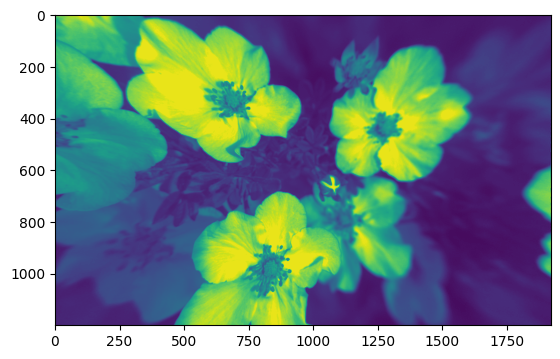

In [21]:
#showcase of a single stimulus image
plt.imshow(stimulus_templates.iloc[0]["warped"])
print(stimulus_templates.iloc[0]["warped"].shape)
print(stimulus_templates.iloc[0]["warped"][0][0])

In [22]:
# plotting a timeseries of the event and dff traces for a single cell (copied from the official tutorial from allen)
cell_specimen_ids = experiment.cell_specimen_table.index.values # a list of all cell ids
cell_specimen_id = cell_specimen_ids[5] # let's pick 6th cell
print('Cell specimen id = {}'.format(cell_specimen_id)) # print id

Cell specimen id = 1086614819


In [23]:
stimulus_table.head()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,stimulus_name,is_sham_change,active
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
0,0,initial_gray_screen_5min,-99,NaN,-99,309.311855,0.000000,309.311855,0,17985,False,<NA>,<NA>,-99,0,-99,spontaneous,False,False
1,1,change_detection_behavior,0,im065,-99,0.250210,309.311855,309.562065,17985,18000,False,False,False,-99,1,0,Natural_Images_Lum_Matched_set_training_2017,False,True
2,1,change_detection_behavior,0,im065,-99,0.250230,310.062485,310.312715,18030,18045,False,False,False,-99,2,0,Natural_Images_Lum_Matched_set_training_2017,False,True
3,1,change_detection_behavior,0,im065,-99,0.250210,310.813105,311.063315,18075,18090,False,False,False,-99,3,0,Natural_Images_Lum_Matched_set_training_2017,False,True
4,1,change_detection_behavior,0,im065,-99,0.250200,311.563725,311.813925,18120,18135,False,False,False,-99,4,0,Natural_Images_Lum_Matched_set_training_2017,False,True


Text(0.5, 0, 'time (seconds)')

Text(0, 0.5, 'trace magnitude')

Text(0.5, 1.0, 'Cell specimen id = 1086614819')

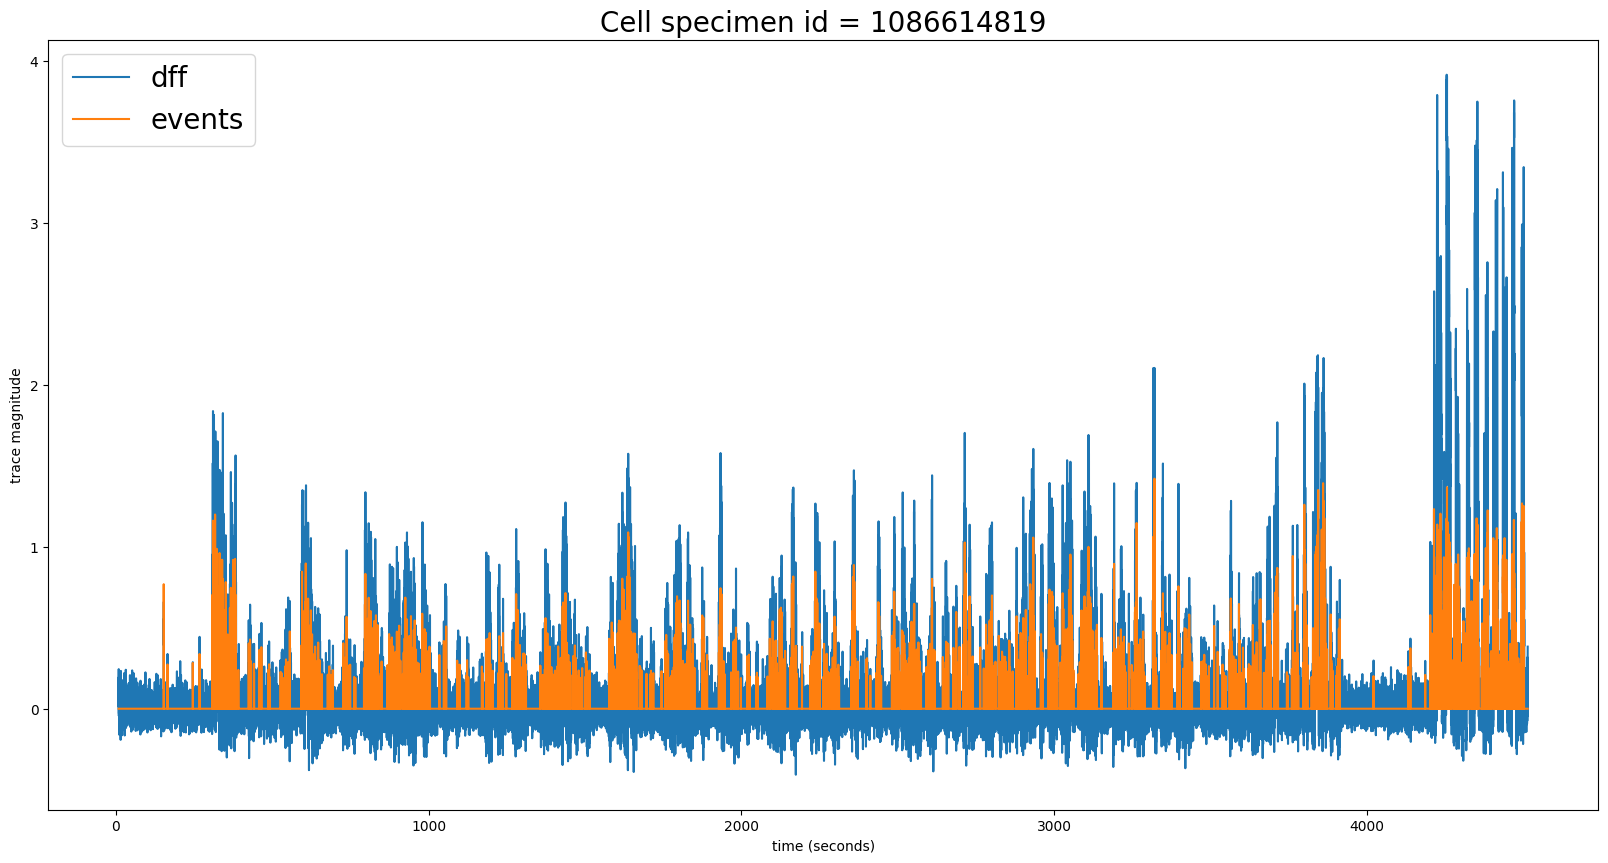

In [24]:
# plot dff and events traces overlaid from the cell selected above
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.plot(experiment.ophys_timestamps, experiment.dff_traces.loc[cell_specimen_id, 'dff'])
ax.plot(experiment.ophys_timestamps, experiment.events.loc[cell_specimen_id, 'events'])
ax.set_xlabel('time (seconds)')
ax.set_ylabel('trace magnitude')
ax.set_title('Cell specimen id = {}'.format(cell_specimen_id), fontsize = 20)
ax.legend(['dff', 'events'], fontsize = 20)
plt.show()

## Sample export of the data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
pd.set_option('display.max_columns', 500)

from allensdk.brain_observatory.behavior.behavior_ophys_experiment import BehaviorOphysExperiment
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

import allensdk
import pkg_resources

import yaml

# Suppress all warnings because there are a lot of annoying user warnings when downloading stuff
import warnings
warnings.filterwarnings("ignore")

# Setting up InteractiveShell for better df visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# exporter functions
from allen_exporter.exporter import multi_session_export

print("Import confirmed")
print("Allensdk version : ", allensdk.__version__)

Import confirmed
Allensdk version :  2.16.2


In [2]:
cache, ids = multi_session_export(2, val_rate= 0.2, subsample_frac=0.2)

Fetching experiment 951980471
Fetching experiment 951980473


processing data: 801it [00:00, 2070.73it/s]     | 0/2 [00:00<?, ?it/s]
processing data: 801it [00:00, 2070.60it/s]     | 1/2 [00:00<00:00,  2.12it/s]
Processing Experiment 951980473: 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

Export completed
